In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from pca import pca
import seaborn as sns

In [45]:
wine = pd.read_csv("C:\\Aalesh and Mandar\\Datasets\\wine.csv")

In [46]:
wine.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
wine2 = wine.drop("Class", axis=1)

In [48]:
wine.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [49]:
wine.shape

(178, 14)

In [50]:
scalar = StandardScaler()

In [51]:
scaled_wine = scalar.fit_transform(wine2)

In [52]:
pca = PCA()

In [53]:
prin_comp = pca.fit_transform(scaled_wine)

In [54]:
print(pca.explained_variance_)

[4.73236246 2.51113845 1.45423171 0.92427285 0.85801661 0.64527688
 0.55414978 0.3505318  0.29049367 0.2522538  0.22706212 0.16970095
 0.10395527]


In [55]:
print(pca.explained_variance_ratio_ * 100)

[36.19827807 19.20793023 11.12355281  7.06984848  6.56304838  4.93578254
  4.2387429   2.68125013  2.22201296  1.92951266  1.73681912  1.29805828
  0.79516344]


Text(0, 0.5, 'Cumulative percentage variation explained')

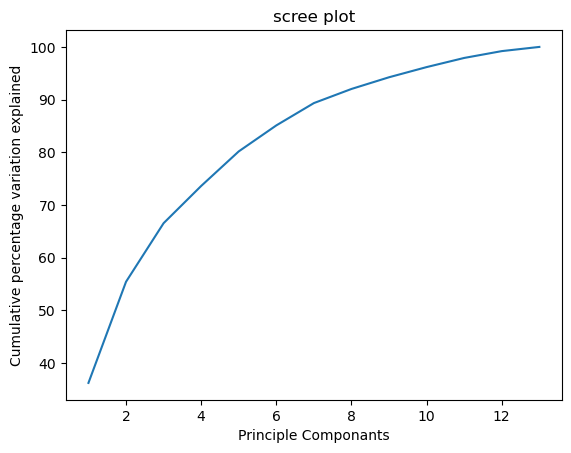

In [56]:
ys=np.cumsum(pca.explained_variance_ratio_ * 100)
xs=np.arange(1,14)
plt.plot(xs, ys)
plt.title("scree plot")
plt.xlabel("Principle Componants")
plt.ylabel("Cumulative percentage variation explained")

In [57]:
pd_PC = pd.DataFrame(prin_comp,columns = ["PC"+str(i) for i in np.arange(1,14)])

In [58]:
pd_PC["Class"] = wine["Class"]

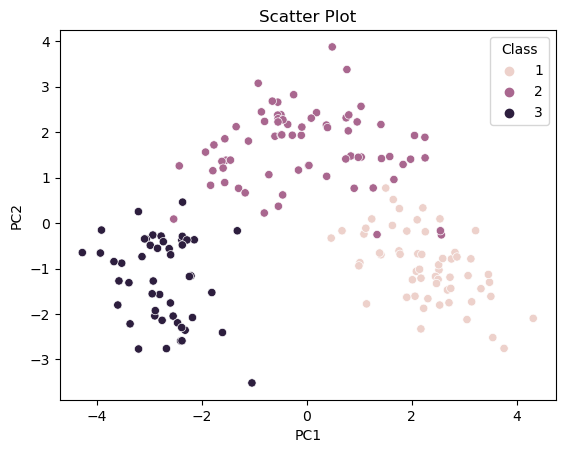

In [60]:
sns.scatterplot(data=pd_PC, x="PC1", y="PC2", hue="Class")
plt.title("Scatter Plot")
plt.show()